In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

In [7]:
dataset_path = Path(r"./captum/blue_waters_captum_test_data.csv")

In [8]:
df = pd.read_csv(Path(r"./captum/blue_waters_captum_ig_result.csv"))
df_dl = pd.read_csv(Path(r"./captum/blue_waters_captum_dl_result.csv"))

In [10]:
df_data = pd.read_csv(dataset_path)
df_data.head()

,Unnamed: 0,index,POSIX_OPENS,POSIX_FILENOS,POSIX_DUPS,POSIX_READS,POSIX_WRITES,POSIX_SEEKS,POSIX_STATS,POSIX_MMAPS,...,WRITE_10K_100K,WRITE_100K_1M,WRITE_1M_4M,WRITE_4M_10M,WRITE_10M_100M,WRITE_100M_1G,WRITE_1G_PLUS,rank,nprocs,lustre
0,0,588955,169,-26,-26,1559,1641,2635,480,0,...,152,2,0,0,0,0,0,0,11,1
1,1,253293,8709,-288,-288,1400634,6329265,2013885,28430,0,...,9,25830,506,0,0,0,0,-1,256,1
2,2,435591,169,-26,-26,1559,1641,2635,480,0,...,286,112,0,0,0,0,0,4,11,1
3,3,54849,1736,-66,-66,94172,44324,104965,3407,0,...,5339,2588,179,0,0,0,0,-1,64,1
4,4,711505,113,-13,-13,45728,10982,75,224,0,...,0,0,0,0,0,0,0,-1,16,1


In [11]:
df.head()

,Unnamed: 0,POSIX_OPENS,POSIX_FILENOS,POSIX_DUPS,POSIX_READS,POSIX_WRITES,POSIX_SEEKS,POSIX_STATS,POSIX_MMAPS,POSIX_FSYNCS,...,WRITE_10K_100K,WRITE_100K_1M,WRITE_1M_4M,WRITE_4M_10M,WRITE_10M_100M,WRITE_100M_1G,WRITE_1G_PLUS,rank,nprocs,lustre
0,0,0.000046,0.000073,0.000024,-0.000025,-0.000164,-0.000107,0.000233,-0.000012,0.000012,...,0.000082,-0.000203,-0.000072,-1.551454e-05,-0.000049,-0.000099,-0.000005,-1.712510e-04,-0.000348,-0.000277
1,1,0.000035,0.000200,0.000085,-0.000002,-0.000002,-0.000005,0.000062,0.000008,0.000025,...,0.000099,0.000102,-0.000163,-1.349889e-07,0.000051,-0.000120,-0.000039,-6.923102e-07,-0.000031,0.000101
2,2,0.000048,0.000071,0.000021,-0.000028,-0.000177,-0.000105,0.000245,-0.000012,0.000013,...,0.000082,-0.000195,-0.000068,-1.514097e-05,-0.000048,-0.000097,-0.000006,-4.742577e-05,-0.000344,-0.000272
3,3,0.000044,0.000056,0.000018,-0.000028,-0.000160,-0.000105,0.000215,-0.000011,0.000012,...,0.000061,-0.000165,-0.000063,-1.552210e-05,-0.000049,-0.000098,-0.000006,-1.997440e-04,-0.000267,-0.000283
4,4,0.000047,0.000077,0.000019,-0.000021,-0.000160,-0.000106,0.000226,-0.000013,0.000012,...,0.000081,-0.000203,-0.000072,-1.506858e-05,-0.000049,-0.000098,-0.000006,-2.073508e-04,-0.000343,-0.000275


In [12]:
df_dl.head()

,Unnamed: 0,POSIX_OPENS,POSIX_FILENOS,POSIX_DUPS,POSIX_READS,POSIX_WRITES,POSIX_SEEKS,POSIX_STATS,POSIX_MMAPS,POSIX_FSYNCS,...,WRITE_10K_100K,WRITE_100K_1M,WRITE_1M_4M,WRITE_4M_10M,WRITE_10M_100M,WRITE_100M_1G,WRITE_1G_PLUS,rank,nprocs,lustre
0,0,0.000041,0.000059,0.000017,-0.000020,-0.000194,-0.000098,0.000225,-0.000013,0.000007,...,0.000090,-0.000146,-0.000097,-1.845174e-05,-0.000056,-0.000114,-0.000009,-0.000199,-0.000351,-0.000350
1,1,0.000027,0.000226,0.000075,0.000032,-0.000001,-0.000007,0.000021,-0.000007,0.000019,...,0.000086,0.000095,-0.000151,-9.346004e-07,0.000035,-0.000106,-0.000037,-0.000055,-0.000047,0.000279
2,2,0.000041,0.000058,0.000013,-0.000023,-0.000199,-0.000096,0.000236,-0.000013,0.000008,...,0.000090,-0.000145,-0.000096,-1.794992e-05,-0.000055,-0.000115,-0.000010,-0.000055,-0.000349,-0.000345
3,3,0.000039,0.000045,0.000014,-0.000021,-0.000192,-0.000101,0.000212,-0.000013,0.000008,...,0.000066,-0.000117,-0.000084,-1.859743e-05,-0.000057,-0.000113,-0.000010,-0.000236,-0.000266,-0.000341
4,4,0.000041,0.000060,0.000019,-0.000018,-0.000193,-0.000099,0.000223,-0.000013,0.000007,...,0.000092,-0.000147,-0.000095,-1.843638e-05,-0.000056,-0.000113,-0.000010,-0.000236,-0.000343,-0.000348


In [13]:
df_diff = df_dl - df
df_diff.describe().transpose()  #.abs().sort_values(ascending=False).head(20)

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,105972.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
POSIX_OPENS,105972.0,1.377074e-06,0.000135,-0.002740,-0.000007,-0.000006,-0.000002,0.011839
POSIX_FILENOS,105972.0,-5.704450e-06,0.000328,-0.023559,-0.000016,-0.000012,0.000015,0.029302
POSIX_DUPS,105972.0,4.412918e-06,0.000357,-0.020752,-0.000010,-0.000004,0.000001,0.037972
POSIX_READS,105972.0,4.740168e-06,0.000216,-0.031938,0.000003,0.000004,0.000011,0.010986
...,...,...,...,...,...,...,...,...
WRITE_100M_1G,105972.0,-1.583192e-05,0.000197,-0.031170,-0.000016,-0.000015,0.000007,0.024805
WRITE_1G_PLUS,105972.0,1.806687e-07,0.000246,-0.020836,-0.000004,-0.000003,0.000002,0.067171
rank,105972.0,-2.790802e-05,0.000130,-0.017650,-0.000043,-0.000029,-0.000024,0.017409
nprocs,105972.0,3.007308e-06,0.000151,-0.010647,-0.000008,-0.000003,0.000014,0.016501


**Attention: std sensitive to outliers?**

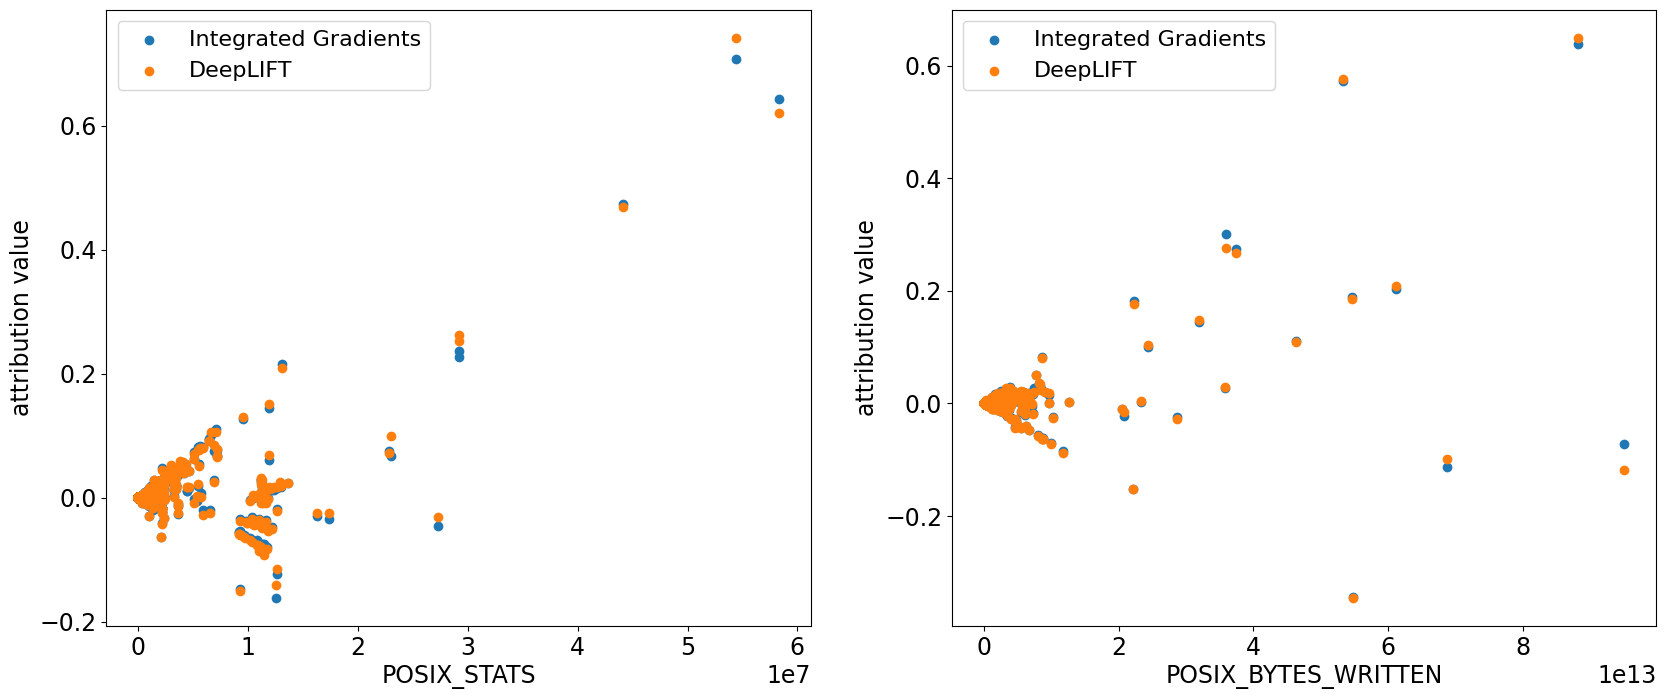

In [15]:
plt.rcParams.update({'font.size': 17})
fig, axs = plt.subplots(nrows = 1, ncols=2, figsize=(20,8))
stats_ig = axs[0].scatter(x=df_data.POSIX_STATS, y=df.POSIX_STATS)
stats_dl = axs[0].scatter(x=df_data.POSIX_STATS, y=df_dl.POSIX_STATS)
axs[0].legend((stats_ig,stats_dl), ("Integrated Gradients", "DeepLIFT"), prop={'size': 16})
axs[0].set_xlabel("POSIX_STATS")
axs[0].set_ylabel("attribution value")
bytes_ig = axs[1].scatter(x=df_data.POSIX_BYTES_WRITTEN, y=df.POSIX_BYTES_WRITTEN, label="Integrated Gradients")
bytes_dl = axs[1].scatter(x=df_data.POSIX_BYTES_WRITTEN, y=df_dl.POSIX_BYTES_WRITTEN, label="DeepLIFT")
axs[1].legend((bytes_ig,bytes_dl), ("Integrated Gradients", "DeepLIFT"), prop={'size': 16})
axs[1].set_xlabel("POSIX_BYTES_WRITTEN")
axs[1].set_ylabel("attribution value")
plt.savefig("captum_difference_plot.png", format="png", bbox_inches="tight", dpi=600)

In [16]:
df_diff["POSIX_OPENS"].sort_values(ascending=False).head()

15665    0.011839
44338    0.011037
81920    0.010688
24029    0.008411
71030    0.008337
Name: POSIX_OPENS, dtype: float64

In [17]:
df_data.iloc[29918]

Unnamed: 0        29918
index            233946
POSIX_OPENS         169
POSIX_FILENOS       -26
POSIX_DUPS          -26
                  ...  
WRITE_100M_1G         0
WRITE_1G_PLUS         0
rank                  0
nprocs               11
lustre                1
Name: 29918, Length: 92, dtype: int64

In [18]:
df.iloc[29918].POSIX_OPENS

4.5945962e-05

In [19]:
df_dl.iloc[29918].POSIX_OPENS

4.058443e-05

In [84]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,10000.0,4999.500000,2886.895680,0.000000,2499.750000,4999.500000,7499.250000,9999.000000
POSIX_OPENS,10000.0,-11.479374,23.148323,-492.478152,-19.677123,-12.086118,-4.626800,269.004393
POSIX_FILENOS,10000.0,2.537756,3.122381,-22.079009,0.146714,1.642464,4.771763,48.567807
POSIX_DUPS,10000.0,2.586905,3.066911,-16.937769,0.157459,1.730451,4.964913,45.352974
POSIX_READS,10000.0,-0.876885,6.597008,-17.203592,-4.759181,-3.607125,0.110261,67.229743
POSIX_WRITES,10000.0,-0.092915,5.720806,-9.261403,-2.674532,-1.961574,-0.295324,32.588173
POSIX_SEEKS,10000.0,0.665835,8.688830,-7.552217,-4.068431,-2.700365,-0.101878,55.602418
POSIX_STATS,10000.0,3.419753,43.765593,-89.706655,-9.563671,-5.430700,1.950873,750.832816
POSIX_MMAPS,10000.0,0.954359,2.914927,-203.968266,0.681808,0.991076,1.361118,22.591555
POSIX_FSYNCS,10000.0,0.015032,1.589096,-4.680012,-0.075223,-0.036703,0.036149,83.213408


Compute distance to baseline per row. Baseline output is about 75, so be careful with the interpretation around ig_value of 0!

In [22]:
df.sum(axis=1).describe()

count    10000.000000
mean      4992.875766
std       2887.261195
min        -73.790314
25%       2494.294743
50%       4993.982059
75%       7477.957624
max      10199.159879
dtype: float64

In [23]:
df_dl.sum(axis=1).describe()

count    10000.000000
mean      4992.807180
std       2887.255782
min        -72.366381
25%       2494.381266
50%       4992.047513
75%       7478.721709
max      10203.415276
dtype: float64

In [14]:
df_data.nprocs

0           48
1           10
2           11
3         1024
4           42
          ... 
131887      16
131888      16
131889      32
131890      48
131891      80
Name: nprocs, Length: 131892, dtype: int64

In [15]:
df_data.index

RangeIndex(start=0, stop=131892, step=1)

In [9]:
df_data.head()

,Unnamed: 0,POSIX_OPENS,POSIX_FILENOS,POSIX_DUPS,POSIX_READS,POSIX_WRITES,POSIX_SEEKS,POSIX_STATS,POSIX_MMAPS,POSIX_FSYNCS,...,WRITE_10K_100K,WRITE_100K_1M,WRITE_1M_4M,WRITE_4M_10M,WRITE_10M_100M,WRITE_100M_1G,WRITE_1G_PLUS,rank,nprocs,POSIX_TOTAL_TIME
0,635941,4632,-697,-697,211180,31466,192276,14174,0,1,...,3140,100,0,0,0,0,0,-1,48,26.514707
1,438083,93,-10,-10,0,3840,60,3,0,0,...,0,0,0,0,0,3840,0,3,10,217.513259
2,409857,169,-26,-26,1559,1641,2635,480,0,0,...,396,2,0,0,0,0,0,0,11,0.252513
3,438447,1025,-1,-1,0,8,1,1,0,0,...,0,8,0,0,0,0,0,-1,1024,1.031402
4,601805,44102,-8736,-8736,3190571,1038080,1976335,157420,0,1,...,4672,1198,0,0,0,0,0,-1,42,104.239980


In [10]:
len(df_data)

131892

In [19]:
df_to_plot_nprocs.nprocs.unique()

array([   48,    10,    11,  1024,    42,    16,    32,    64,   304,
          80,    34,     1,   192,   112,     8,   128,     4,    96,
          39,    19,   512,    31,   256,   160,    24,   144,    51,
         625,     2,    28,   208,    21,   386,    40,  2000,    30,
          46,    27,  3200,   473,    38,    47,   655,    29,   865,
         224,   363,   481,     6,   359,  2048,    44,   554,   423,
          26,   470,    25,    37,   429,   800,   420,  2880,   622,
         721,    36,   576,   409,   561,    33,    41,   320,   392,
        4096,   100,    45,     5,   468,     3,    12,  4000,   686,
         101,    14,   484,   861,   414,  9600,  3000,   382,   676,
          43,  8192,   353,   400,   666,    72,   313,  1536,     9,
           7,   394,    61, 10240, 32768,   651,   351,  1824,  3072,
        1201,   768,   330,   482,   495,   493,    15,  1600,  1046,
         377,  4800,   560,  2400,   685,    22,  1176,    35,   273,
         437,   654,

- nprocs: only important if it gets really high.
- CONSEC_READS: if reads are consecutive, performance is better.
- CONSEC_WRITES: if writes are consecutive, performance is worse. Why??
- rank: in 56% of the entire dataset the rank is -1, so probably unknown

In [13]:
plt.rcParams.update({'font.size': 23})

In [7]:
def plot_df_w_filter(df,filterexp,column,coord,color_column="POSIX_BYTES_READ"):
    df[filterexp].plot.scatter(x=df.column,y=df_data.column, ax=coord,
                                                 c=np.log10(df_no_outliers[filterexp].POSIX_BYTES_READ),colorbar=True)

In [8]:
def plot_mosaic(filter_spec):
    fig, axs = plt.subplots(nrows = 3, ncols=3, figsize=(30, 20))
    plot_df_w_filter(df_no_outliers,filter_spec,"nprocs",axs[0,0])
    plot_df_w_filter(df_no_outliers,filter_spec,"POSIX_READS",axs[0,1])
    plot_df_w_filter(df_no_outliers,filter_spec,"POSIX_CONSEC_READS",axs[0,2])
    plot_df_w_filter(df_no_outliers,filter_spec,"POSIX_WRITES",axs[1,0],"POSIX_BYTES_WRITTEN")
    df_no_outliers[filter_spec].plot.scatter(x="POSIX_BYTES_READ",y="POSIX_TOTAL_TIME",ax=axs[1,1])
    plt.show()

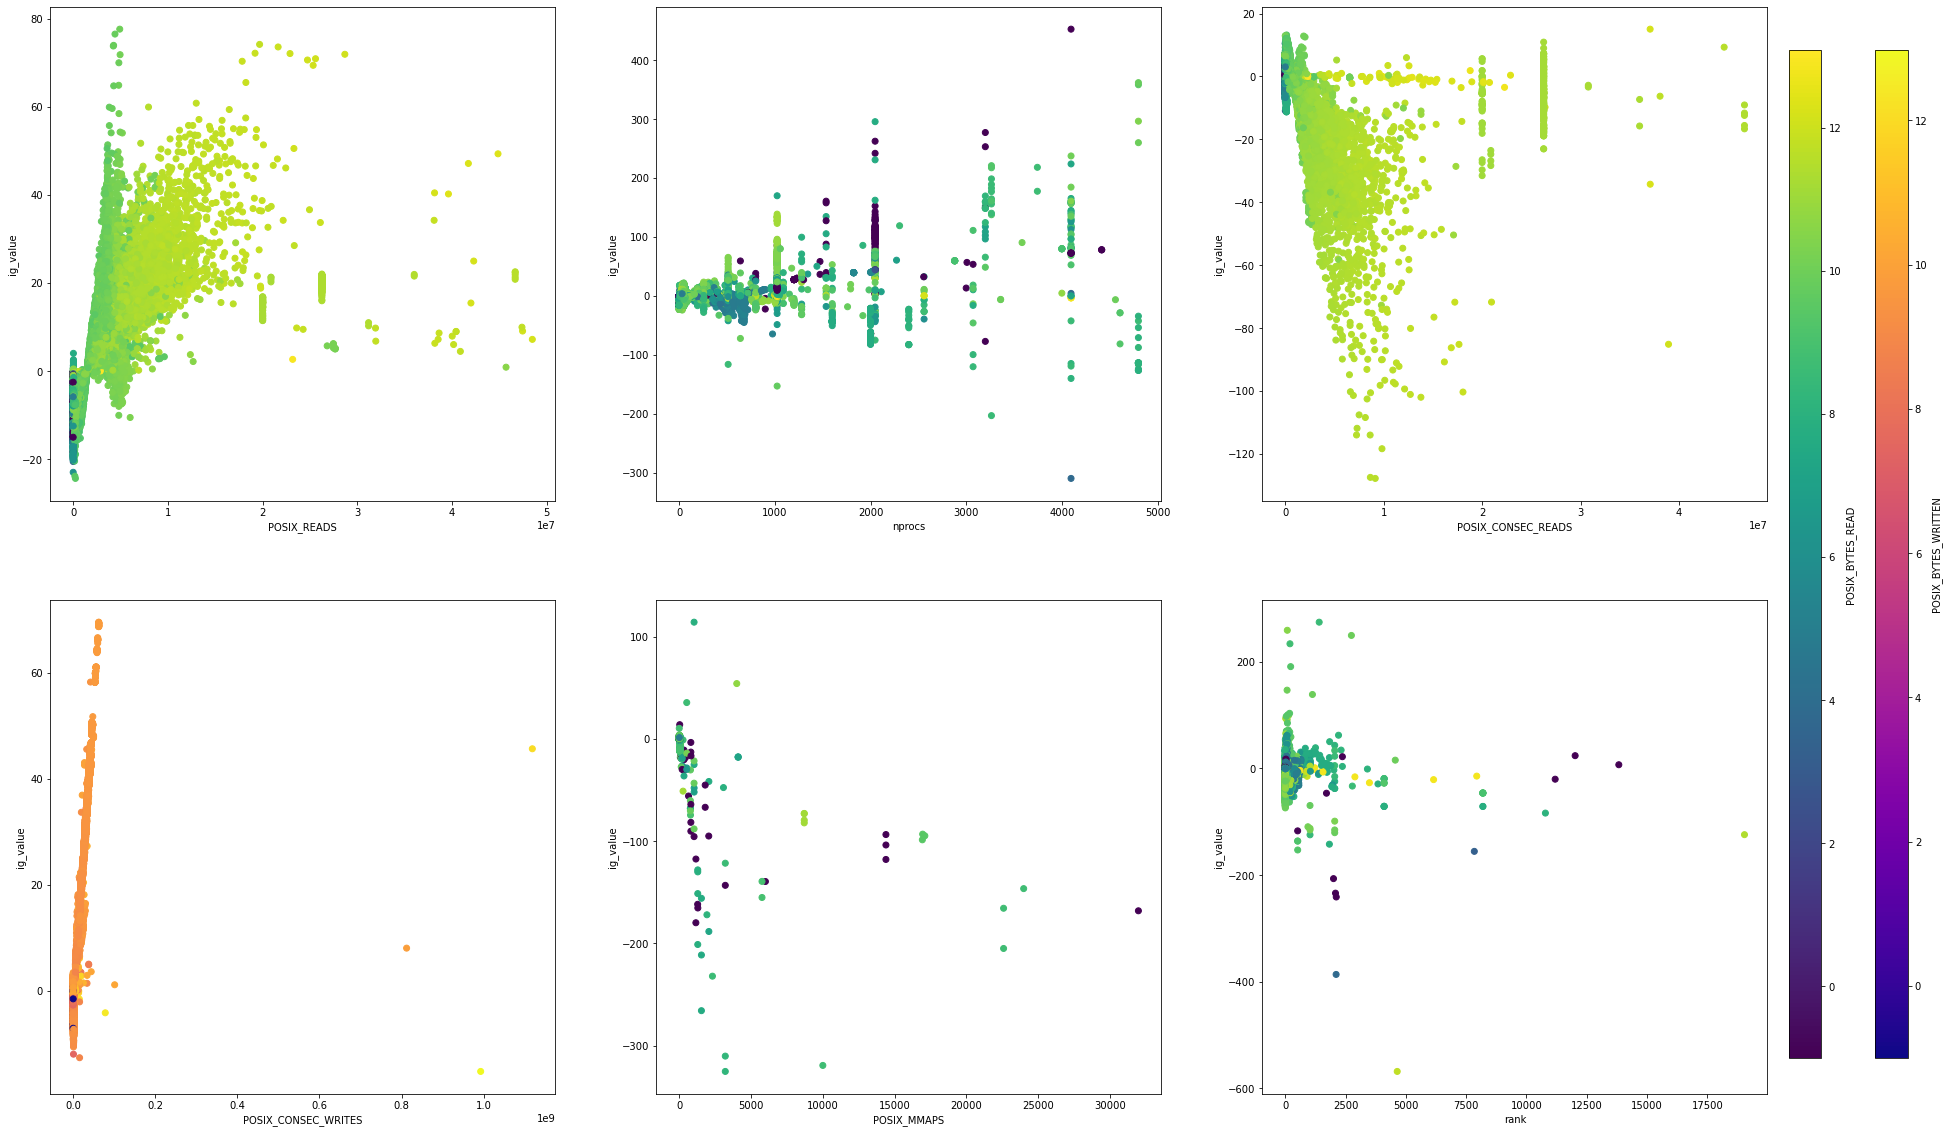

In [13]:
bytes_read_copy = df_data.POSIX_BYTES_READ.copy().where(df_data.POSIX_BYTES_READ > 0,0.1)
bytes_written_copy = df_data.POSIX_BYTES_WRITTEN.copy().where(df_data.POSIX_BYTES_WRITTEN > 0,0.1)
fig, axs = plt.subplots(nrows = 2, ncols=3, figsize=(30, 20))
[ax.set_ylabel("ig_value") for axs_x in axs for ax in axs_x]
reads_filter = df_data.POSIX_READS < 0.5e8
sc_read = axs[0,0].scatter(x=df_data[reads_filter].POSIX_READS,y=df[reads_filter].POSIX_READS,c=np.log10(bytes_read_copy[reads_filter]))
axs[0,0].set_xlabel("POSIX_READS")
nprocs_filter = df_data.nprocs < 5000
axs[0,1].scatter(x=df_data[nprocs_filter].nprocs,y=df[nprocs_filter].nprocs,c=np.log10(bytes_read_copy[nprocs_filter]))
axs[0,1].set_xlabel("nprocs")
consec_reads_filter = df_data.POSIX_CONSEC_READS < 0.5e8
axs[0,2].scatter(x=df_data[consec_reads_filter].POSIX_CONSEC_READS,y=df[consec_reads_filter].POSIX_CONSEC_READS,c=np.log10(bytes_read_copy[consec_reads_filter]))
axs[0,2].set_xlabel("POSIX_CONSEC_READS")
sc_written = axs[1,0].scatter(x=df_data.POSIX_CONSEC_WRITES,y=df.POSIX_CONSEC_WRITES,c=np.log10(bytes_written_copy),cmap="plasma")
axs[1,0].set_xlabel("POSIX_CONSEC_WRITES")
axs[1,1].scatter(x=df_data.POSIX_MMAPS,y=df.POSIX_MMAPS,c=np.log10(bytes_read_copy))
axs[1,1].set_xlabel("POSIX_MMAPS")
rank_filter = df_data["rank"] == -1
axs[1,2].scatter(x=df_data["rank"][rank_filter == False],y=df["rank"][rank_filter == False],c=np.log10(bytes_read_copy[rank_filter == False]))
axs[1,2].set_xlabel("rank")

fig.subplots_adjust(right=0.92)
cbar_ax_read = fig.add_axes([0.93, 0.15, 0.015, 0.7])
cbar_ax_write = fig.add_axes([0.97, 0.15, 0.015, 0.7])
fig.colorbar(sc_read,cax=cbar_ax_read, shrink=0.7,label="POSIX_BYTES_READ")
fig.colorbar(sc_written,cax=cbar_ax_write, shrink=0.7,label="POSIX_BYTES_WRITTEN")

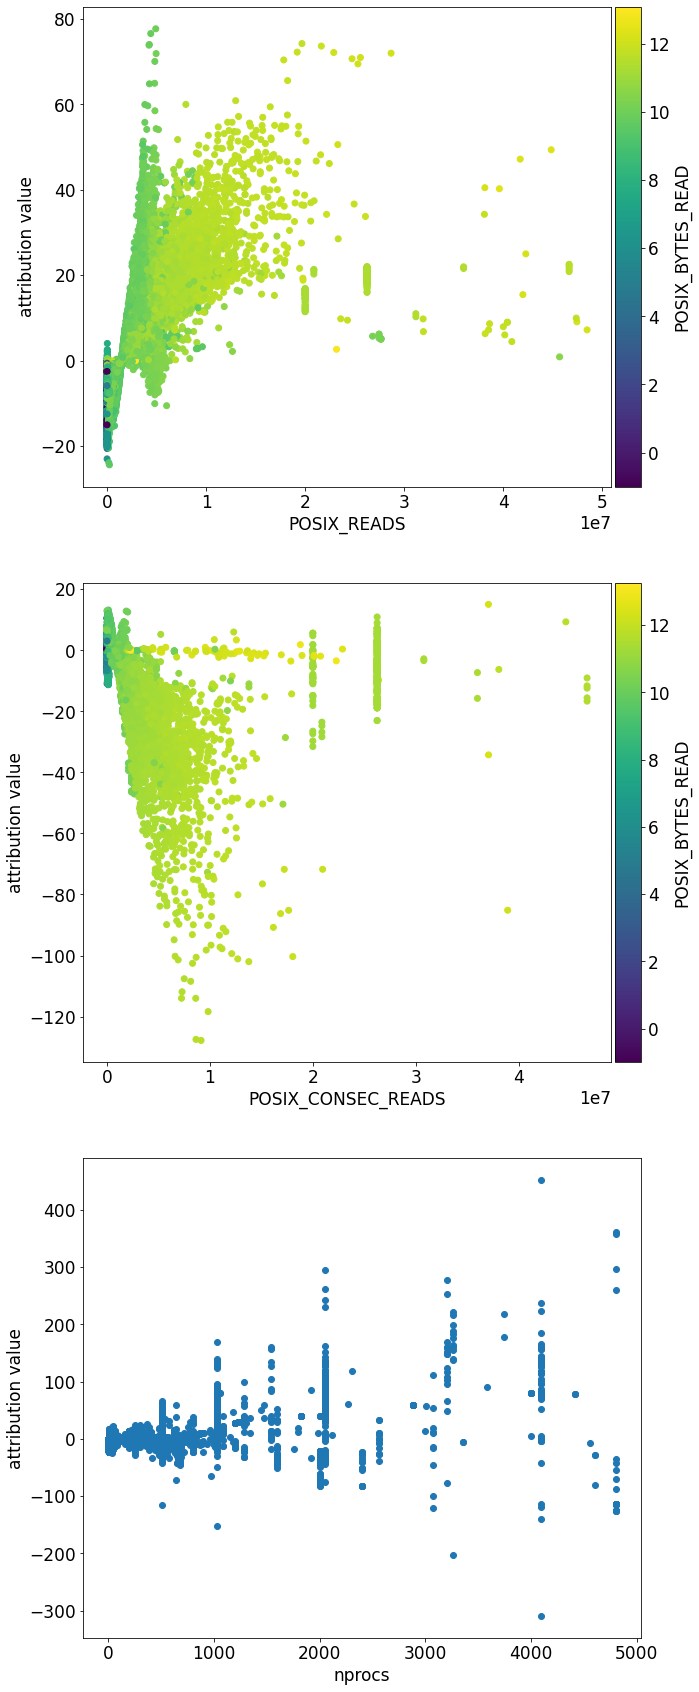

In [24]:
plt.rcParams.update({'font.size': 17})
bytes_read_copy = df_data.POSIX_BYTES_READ.copy().where(df_data.POSIX_BYTES_READ > 0,0.1)
bytes_written_copy = df_data.POSIX_BYTES_WRITTEN.copy().where(df_data.POSIX_BYTES_WRITTEN > 0,0.1)
fig, axs = plt.subplots(nrows = 3, ncols=1, figsize=(10, 30))
[ax.set_ylabel("attribution value") for ax in axs]
reads_filter = df_data.POSIX_READS < 0.5e8
sc_read = axs[0].scatter(x=df_data[reads_filter].POSIX_READS,y=df[reads_filter].POSIX_READS,c=np.log10(bytes_read_copy[reads_filter]))
axs[0].set_xlabel("POSIX_READS")
consec_reads_filter = df_data.POSIX_CONSEC_READS < 0.5e8
sc_consec_read = axs[1].scatter(x=df_data[consec_reads_filter].POSIX_CONSEC_READS,y=df[consec_reads_filter].POSIX_CONSEC_READS,c=np.log10(bytes_read_copy[consec_reads_filter]))
axs[1].set_xlabel("POSIX_CONSEC_READS")
nprocs_filter = df_data.nprocs < 5000
sc_nprocs = axs[2].scatter(x=df_data[nprocs_filter].nprocs,y=df[nprocs_filter].nprocs)
axs[2].set_xlabel("nprocs")

divider = make_axes_locatable(axs[0])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(sc_read, cax=cax, orientation='vertical',label="POSIX_BYTES_READ")
divider = make_axes_locatable(axs[1])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(sc_consec_read, cax=cax, orientation='vertical',label="POSIX_BYTES_READ")
plt.savefig(Path("pictures","captum_plot_IQR_small").with_suffix(".png"),format="png",bbox_inches="tight",dpi=600)

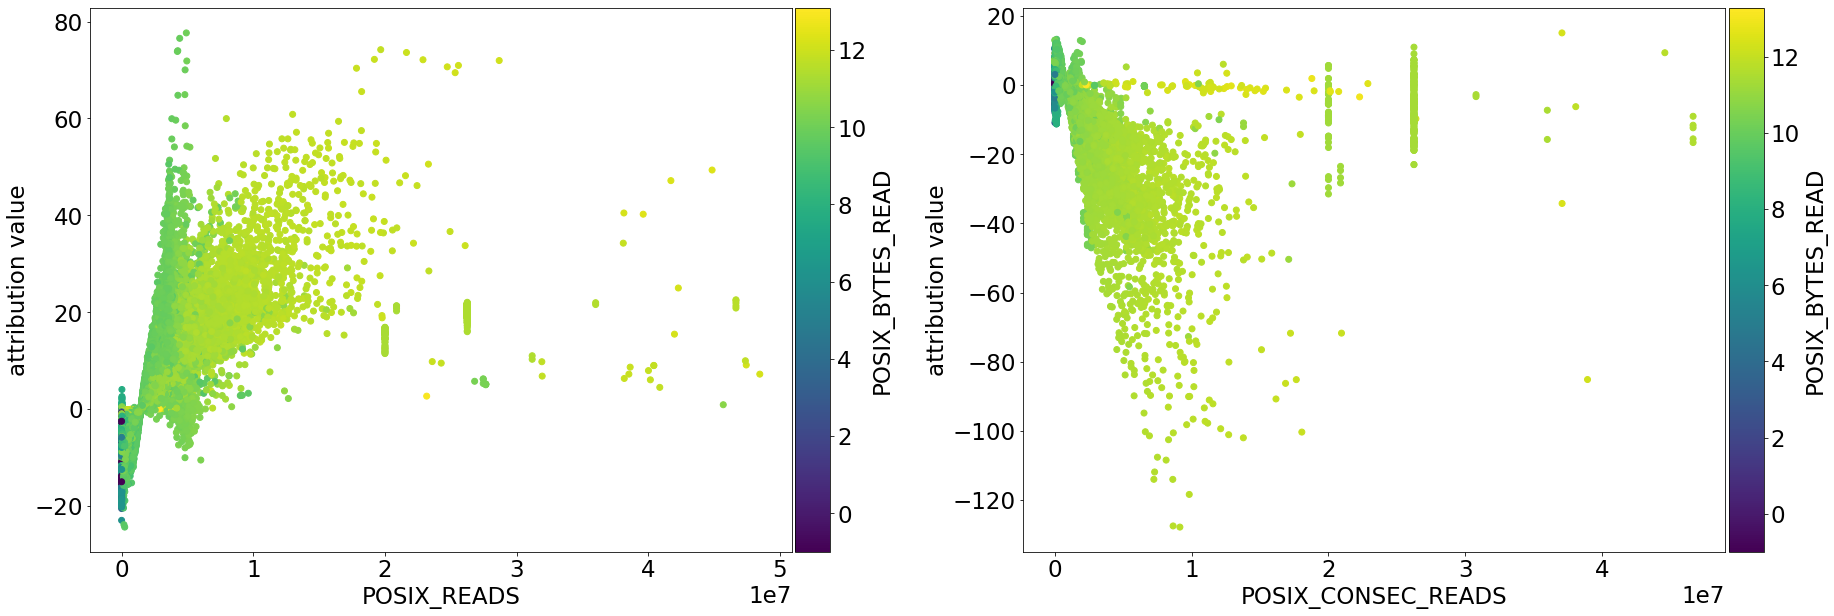

In [22]:
plt.rcParams.update({'font.size': 23})
bytes_read_copy = df_data.POSIX_BYTES_READ.copy().where(df_data.POSIX_BYTES_READ > 0,0.1)
bytes_written_copy = df_data.POSIX_BYTES_WRITTEN.copy().where(df_data.POSIX_BYTES_WRITTEN > 0,0.1)
fig, axs = plt.subplots(nrows = 1, ncols=2, figsize=(30, 10))
plt.subplots_adjust(wspace=0.26)
[ax.set_ylabel("attribution value") for ax in axs]
reads_filter = df_data.POSIX_READS < 0.5e8
sc_read = axs[0].scatter(x=df_data[reads_filter].POSIX_READS,y=df[reads_filter].POSIX_READS,c=np.log10(bytes_read_copy[reads_filter]))
axs[0].set_xlabel("POSIX_READS")
consec_reads_filter = df_data.POSIX_CONSEC_READS < 0.5e8
sc_consec_read = axs[1].scatter(x=df_data[consec_reads_filter].POSIX_CONSEC_READS,y=df[consec_reads_filter].POSIX_CONSEC_READS,c=np.log10(bytes_read_copy[consec_reads_filter]))
axs[1].set_xlabel("POSIX_CONSEC_READS")
divider = make_axes_locatable(axs[0])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(sc_read, cax=cax, orientation='vertical',label="POSIX_BYTES_READ")
divider = make_axes_locatable(axs[1])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(sc_consec_read, cax=cax, orientation='vertical',label="POSIX_BYTES_READ")
plt.savefig(Path("pictures","captum_plot_IQR_small_horizontal").with_suffix(".png"),format="png",bbox_inches="tight",dpi=600)

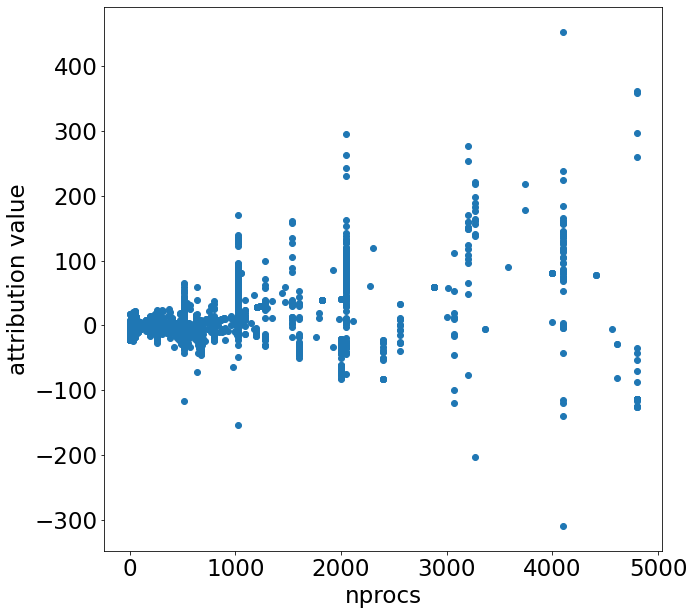

In [23]:
plt.rcParams.update({'font.size': 23})
fig, axs = plt.subplots(nrows = 1, ncols=1, figsize=(10, 10))
plt.subplots_adjust(wspace=0.26)
axs.set_ylabel("attribution value")
nprocs_filter = df_data.nprocs < 5000
sc_nprocs = axs.scatter(x=df_data[nprocs_filter].nprocs,y=df[nprocs_filter].nprocs)
axs.set_xlabel("nprocs")
plt.savefig(Path("pictures","captum_plot_IQR_nprocs").with_suffix(".png"),format="png",bbox_inches="tight",dpi=600)

<AxesSubplot:>

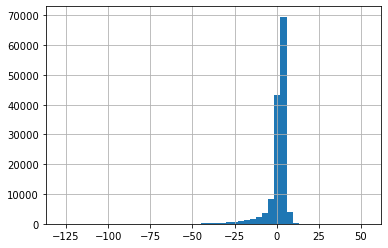

In [18]:
df.POSIX_CONSEC_READS.hist(bins=50)